In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv(r'archive\updated_pollution_dataset.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [19]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


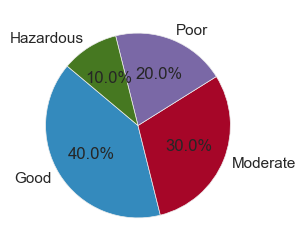

In [20]:
plt.style.use("bmh")
prop_mod_cah = df['Air Quality'].value_counts() # Calcul les proportions d'appartitions des modalités dans la variable
print(prop_mod_cah)
plt.figure(figsize=(3, 3))
plt.pie(prop_mod_cah, labels=prop_mod_cah.index, autopct='%1.1f%%', startangle=140)
plt.show()

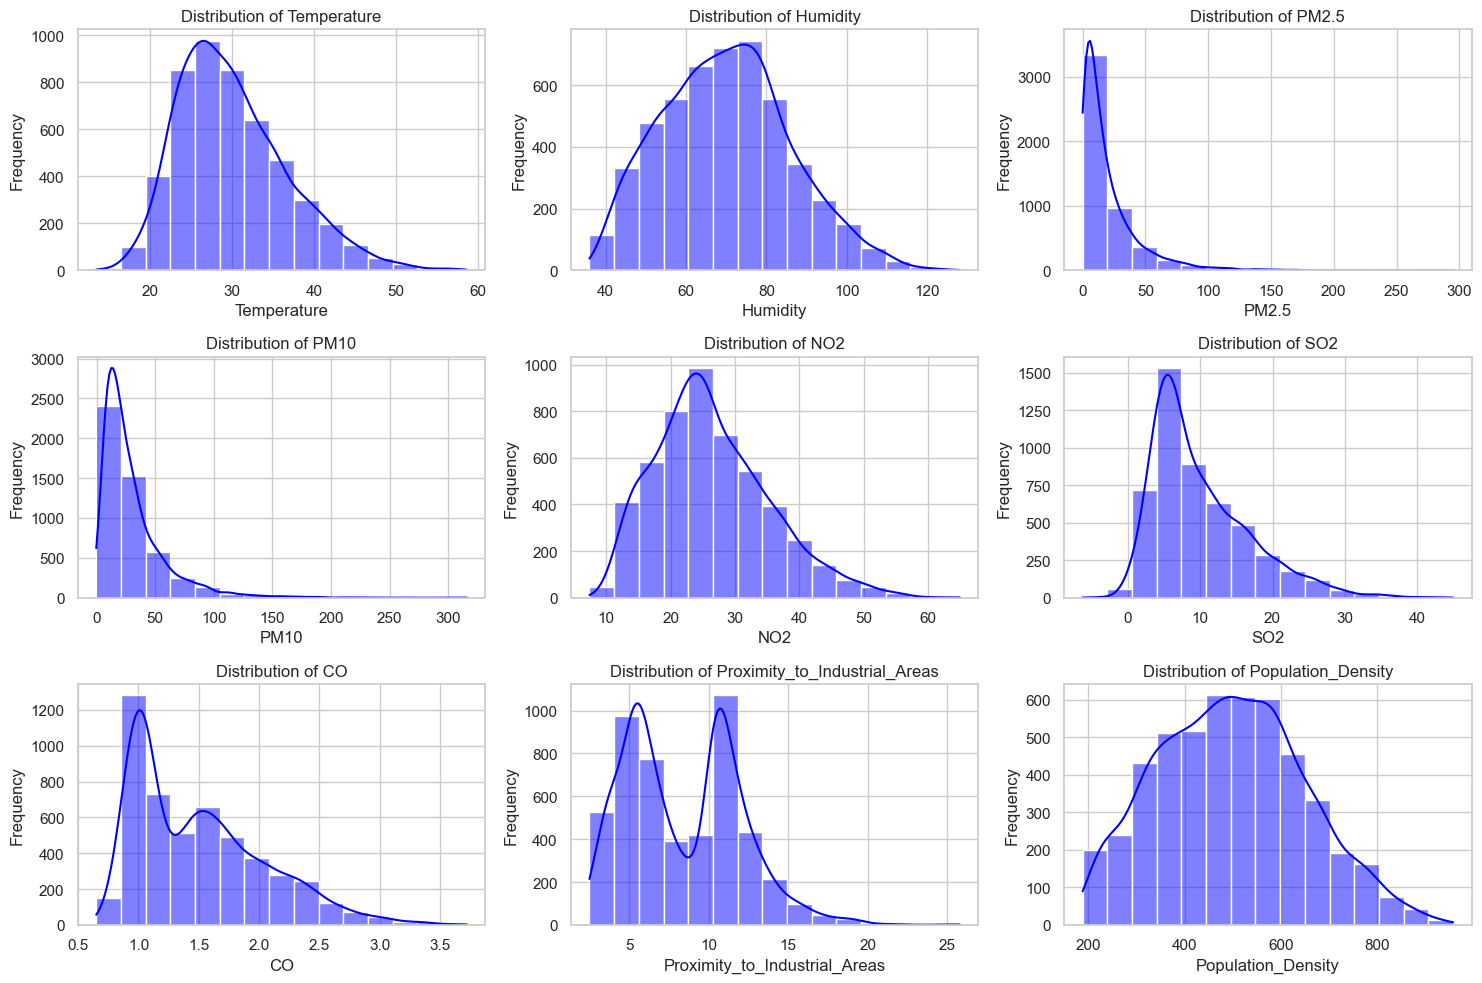

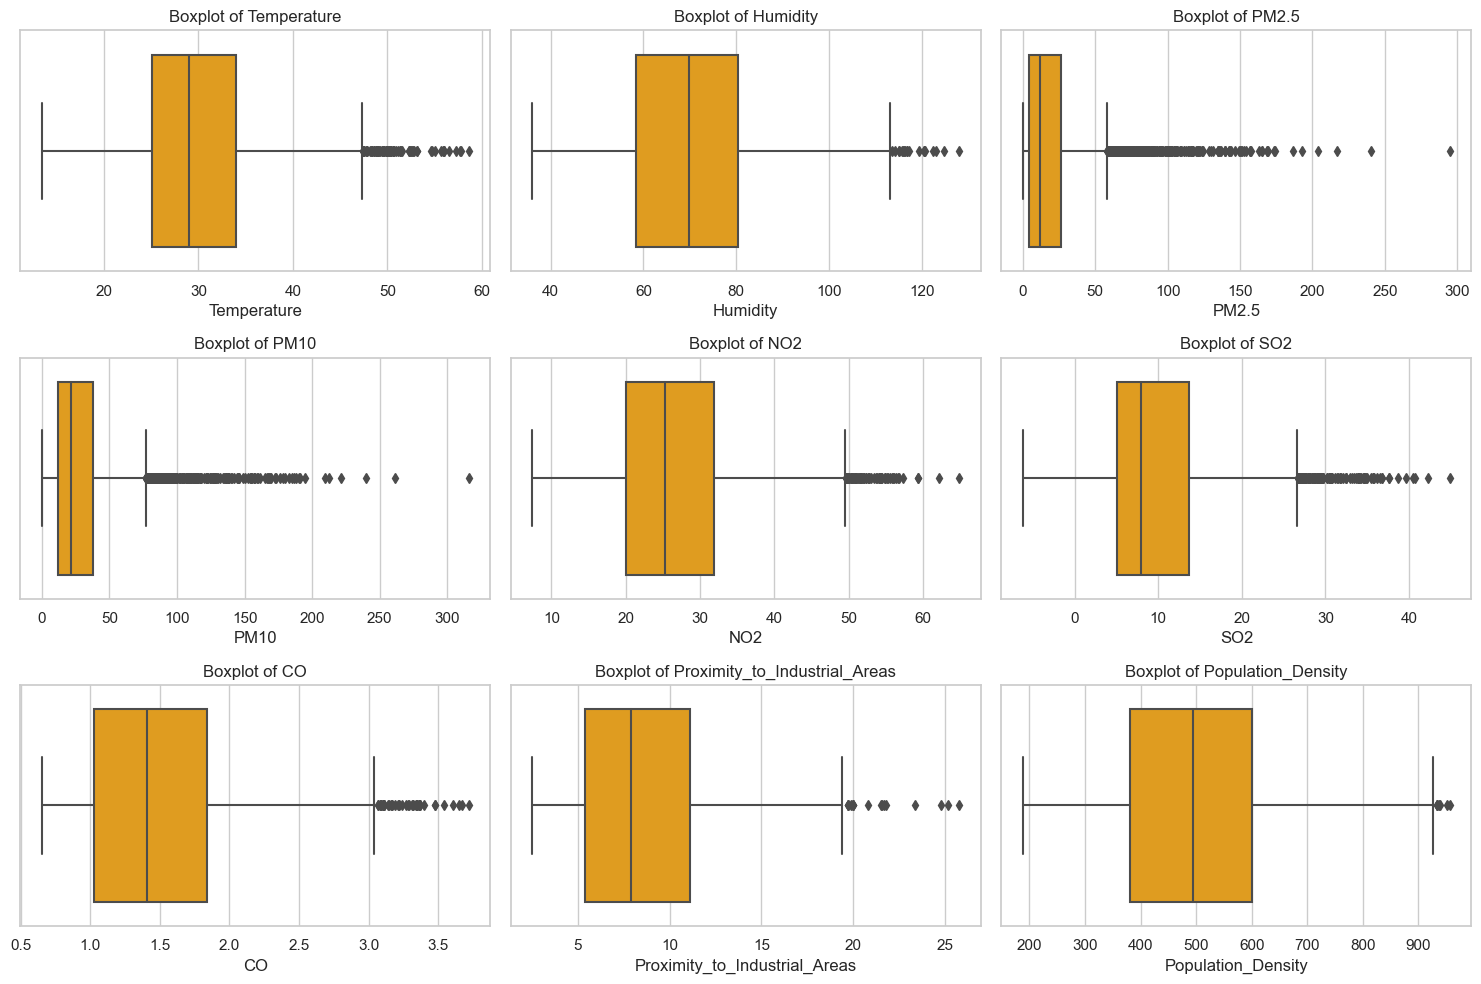

In [21]:
# Configuration de l'affichage
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Création de graphiques pour chaque colonne numérique
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=15, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
